# (Homework) Week 6 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:** Milind Kaushal
**Email:** mk9694@nyu.edu

---

### Problem 1: Dataset Splitting

1. You have recordings of 44 phones from 100 people; each person records ~200 phones/day for 5 days.
   - Design a valid training/validation/test split strategy that ensures the model generalizes to **new speakers**.

2. You now receive an additional dataset of 10,000 phone recordings from **Kilian**, a single speaker.
   - You must train a model that performs well **specifically for Kilian**, while also maintaining generalization.

*Describe your proposed split strategy and reasoning.* (Theory)

#Problem 1 answer

1. The Train/Test/Validation split will be done by speaker and not by recording: Randomly select 80 speakers for training set, 10 for validation set and 10 for test set. We will include all recordings from a speaker in one set to avoid any kind of overlapping between train/test/val sets.
If we split by recording, the same speaker will be present across different splits and the model might memorise which will lead to overestimation of accuracy. That is the reason why we split by speaker for true generalization.

2. We can first traing a generalized model using the first strategy and validate and test it for good generalization capabilities. Then, to adapt it to Killian, we can split Killian's recordings into 8:1:1 ratio (train:test:val). Fine tune the base model on Killian's train subset with early stopping on validation loss to avoid overfitting. This is a form of transfer learning that will help us adapt the model to Killian while keeping generalization intact.

### Problem 2: K-Nearest Neighbors

1. **1-NN Classification:** Given dataset:

   Positive: (1,2), (1,4), (5,4)

   Negative: (3,1), (3,2)

   Plot the 1-NN decision boundary and classify new points visually.

2. **Feature Scaling:** Consider dataset:

   Positive: (100,2), (100,4), (500,4)

   Negative: (300,1), (300,2)

   What would the 1-NN classify point (500,1) as **before and after scaling** to [0,1] per feature?

3. **Handling Missing Values:** How can you modify K-NN to handle missing features in a test point?

4. **High-dimensional Data:** Why can K-NN still work well for images even with thousands of pixels?


#Q2 1)

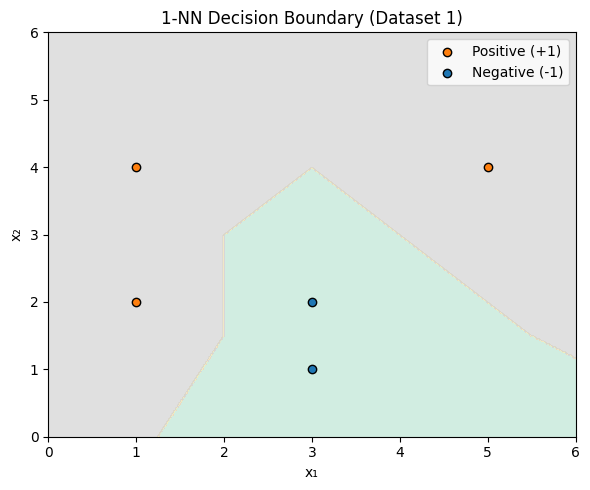

In [16]:
#Todo
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

X = np.array([[1, 2], [1, 4], [5, 4], [3, 1], [3, 2]])
y = np.array([1, 1, 1, 0, 0])  # 1 = positive, 0 = negative

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

x_min, x_max = 0, 6
y_min, y_max = 0, 6
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel2, alpha=0.6)
plt.scatter(X[y==1,0], X[y==1,1], c='tab:orange', label='Positive (+1)', edgecolor='k')
plt.scatter(X[y==0,0], X[y==0,1], c='tab:blue', label='Negative (-1)', edgecolor='k')
plt.title("1-NN Decision Boundary (Dataset 1)")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()
plt.tight_layout()
plt.show()

#Q2 2)

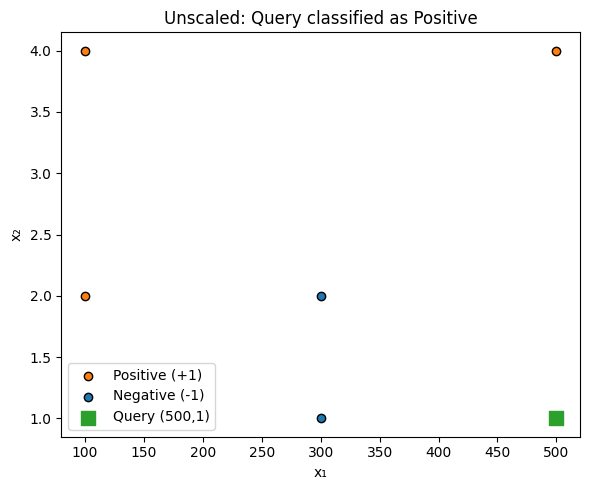

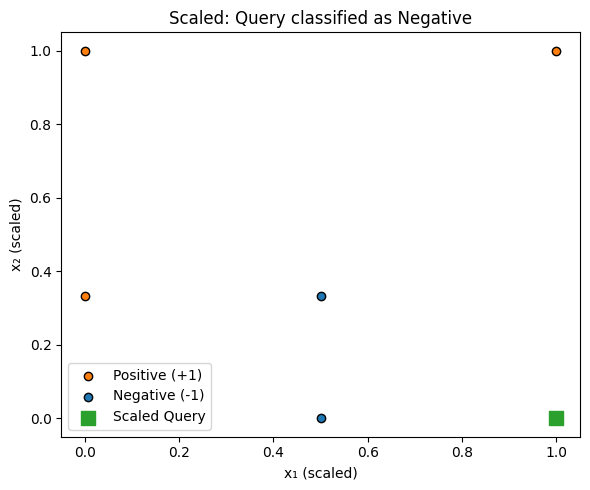

In [17]:
from sklearn.preprocessing import MinMaxScaler

X = np.array([[100,2],[100,4],[500,4],[300,1],[300,2]])
y = np.array([1,1,1,0,0])
query = np.array([[500,1]])

knn_raw = KNeighborsClassifier(n_neighbors=1)
knn_raw.fit(X, y)
pred_raw = knn_raw.predict(query)[0]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
query_scaled = scaler.transform(query)

knn_scaled = KNeighborsClassifier(n_neighbors=1)
knn_scaled.fit(X_scaled, y)
pred_scaled = knn_scaled.predict(query_scaled)[0]

# before scaling
plt.figure(figsize=(6,5))
plt.scatter(X[y==1,0], X[y==1,1], c='tab:orange', label='Positive (+1)', edgecolor='k')
plt.scatter(X[y==0,0], X[y==0,1], c='tab:blue', label='Negative (-1)', edgecolor='k')
plt.scatter(query[0,0], query[0,1], c='tab:green', s=100, marker='s', label='Query (500,1)')
plt.title(f"Unscaled: Query classified as {'Positive' if pred_raw==1 else 'Negative'}")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.legend()
plt.tight_layout()
plt.show()

# after scaling
plt.figure(figsize=(6,5))
plt.scatter(X_scaled[y==1,0], X_scaled[y==1,1], c='tab:orange', label='Positive (+1)', edgecolor='k')
plt.scatter(X_scaled[y==0,0], X_scaled[y==0,1], c='tab:blue', label='Negative (-1)', edgecolor='k')
plt.scatter(query_scaled[0,0], query_scaled[0,1], c='tab:green', s=100, marker='s', label='Scaled Query')
plt.title(f"Scaled: Query classified as {'Positive' if pred_scaled==1 else 'Negative'}")
plt.xlabel("x₁ (scaled)")
plt.ylabel("x₂ (scaled)")
plt.legend()
plt.tight_layout()
plt.show()


#Q2 3)

Ways to handle missing data:

- If a data point is missing some features, K-NN can ignore the missing ones and compute distance only on the available features.

- we can fill in the missing values (imputation) using averages or the nearest neighbors before running K-NN.

- Weighted distances can reduce the impact of unreliable or missing features.

- Always normalize or scale features first so all have equal influence.

#Q2 4)

In high-dimensional data like images, K-NN can still perform well if the features meaningfully represent similarity between samples. Raw pixel values often fail because distances become less informative as dimensions increase (the “curse of dimensionality”). To make K-NN effective, we usually apply dimensionality reduction (like PCA), which captures important visual patterns. With normalized or well-structured features, nearby points in this transformed space tend to belong to the same class, allowing K-NN to classify accurately.

### Problem 3: Part 1

You are given a fully trained Perceptron model with weight vector **w**, along with training set **D_TR** and test set **D_TE**.

1. Your co-worker suggests evaluating $h(x) = sign(w \cdot x)$ for every $(x, y)$ in D_TR and D_TE. Does this help determine whether test error is higher than training error?
2. Why is there no need to compute training error explicitly for the Perceptron algorithm?

#Q3 Part-1 1)

Evaluating ℎ(𝑥)=sign(𝑤⋅𝑥) on both the training and test sets gives predictions, but it doesn’t directly tell us whether the test error is higher than the training error without comparing them to their true labels. The Perceptron model is guaranteed to classify all training samples correctly if the data is linearly separable, meaning its training error is zero. However, the test data may not follow the same distribution, so test error can still be higher. Therefore, simply evaluating ℎ(𝑥) doesn’t determine error differences unless we explicitly check how many predictions are incorrect.

#Q3 Part-1 2)

There is no need to compute training error explicitly because the Perceptron algorithm updates its weights only when it misclassifies a training example. Once training finishes, it means no misclassified examples remain, so the training error is automatically zero (for linearly separable data).

### Problem 3: Two-point 2D Dataset (Part 2)

Run the Perceptron algorithm **by hand or in code** on the following data:

1. Positive class: (10, -2)
2. Negative class: (12, 2)

Start with $w_0 = (0, 0)$ and a learning rate of 1.

- Compute how many updates are required until convergence.
- Write down the sequence of $w_i$ vectors.

In [18]:
# Todo
import numpy as np

X = np.array([
    [10, -2],
    [12,  2]
])
y = np.array([1, -1])

w = np.zeros(2)
learning_rate = 1
converged = False
updates = 0
history = [w.copy()]

while not converged:
    converged = True
    for i in range(len(X)):
        if y[i] * np.dot(w, X[i]) <= 0:
            w = w + learning_rate * y[i] * X[i]
            updates += 1
            history.append(w.copy())
            converged = False

print("Final weight vector:", w)
print("Total updates until convergence:", updates)
print("Sequence of weight vectors:")
for i, wi in enumerate(history):
    print(f"w{i} = {wi}")


Final weight vector: [  2. -18.]
Total updates until convergence: 9
Sequence of weight vectors:
w0 = [0. 0.]
w1 = [10. -2.]
w2 = [-2. -4.]
w3 = [ 8. -6.]
w4 = [-4. -8.]
w5 = [  6. -10.]
w6 = [ -6. -12.]
w7 = [  4. -14.]
w8 = [ -8. -16.]
w9 = [  2. -18.]


### Problem 4: Reconstructing the Weight Vector

Given the log of Perceptron updates:

| x | y | count |
|---|---|--------|
| (0, 0, 0, 0, 4) | +1 | 2 |
| (0, 0, 6, 5, 0) | +1 | 1 |
| (3, 0, 0, 0, 0) | -1 | 1 |
| (0, 9, 3, 6, 0) | -1 | 1 |
| (0, 1, 0, 2, 5) | -1 | 1 |

Assume learning rate = 1 and initial weight $w_0 = (0, 0, 0, 0, 0)$.

Compute the final weight vector after all updates.

#Q4

1. w_1 = w_0 + 2 * (+1) * (0,0,0,0,4) = (0,0,0,0,8)
2. w_2 = w_1 + 1 * (+1) * (0,0,6,5,0) = (0,0,6,5,8)
3. w_3 = w_2 + 1 * (-1) * (3,0,0,0,0) = (-3,0,6,5,8)
4. w_4 = w_3 + 1 * (-1) * (0,9,3,6,0) = (-3,-9,3,-1,8)
5. w_5 = w_4 + 1 * (-1) * (0,1,0,2,5) = (-3,-10,3,-3,3)

**Final vector:**  
w = (-3,-10,3,-3,3)

### Problem 5: Visualizing Perceptron Convergence

Implement a Perceptron on a small 2D dataset with positive and negative examples.

- Plot the data points.
- After each update, visualize the decision boundary.
- Show how it converges to a stable separator.

Converged in 6 updates. Final w=[ 0.6 -0.7], b=0.4


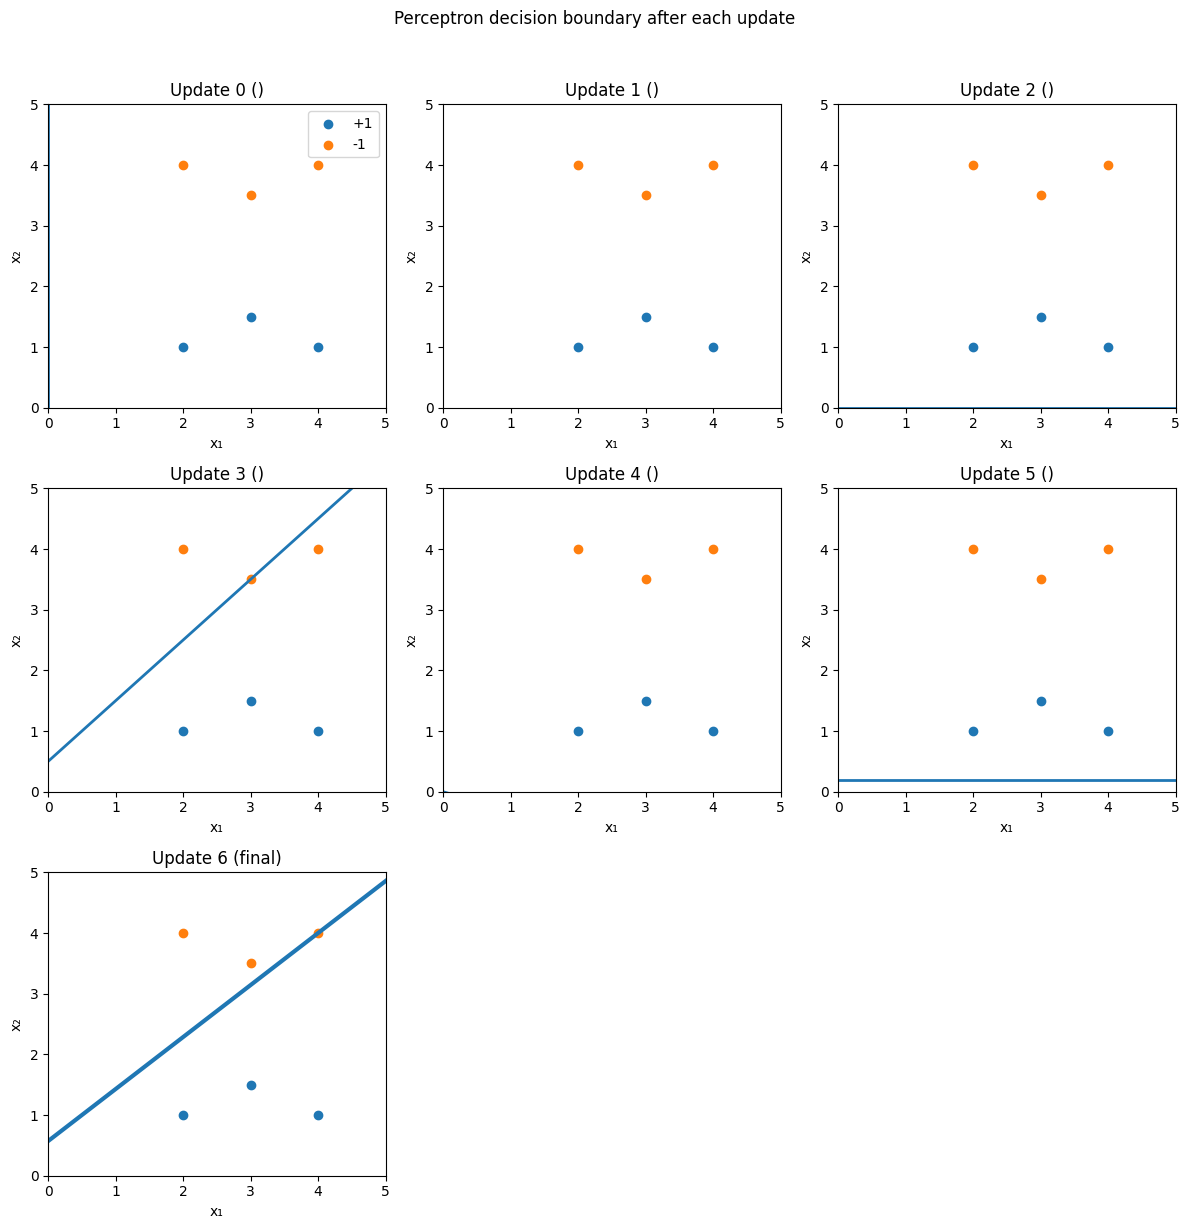

In [19]:
#todo
import numpy as np
import matplotlib.pyplot as plt
import math

X = np.array([
    [2.0, 1.0], [3.0, 1.5], [4.0, 1.0],   # +1
    [2.0, 4.0], [3.0, 3.5], [4.0, 4.0]    # -1
])
y = np.array([1, 1, 1, -1, -1, -1])

def perceptron_train_record(X, y, lr=0.1, max_epochs=50):
    w = np.zeros(2, dtype=float)
    b = 0.0
    history = [(w.copy(), b)]
    for _ in range(max_epochs):
        made_update = False
        for xi, yi in zip(X, y):
            if yi * (np.dot(w, xi) + b) <= 0:
                w += lr * yi * xi
                b += lr * yi
                history.append((w.copy(), b))
                made_update = True
        if not made_update:
            break
    return w, b, history

w, b, history = perceptron_train_record(X, y, lr=0.2)
print(f"Converged in {len(history)-1} updates. Final w={w}, b={b}")

def plot_boundary(ax, w, b, xlim=(0,5), ylim=(0,5), linewidth=2):
    x1 = np.linspace(xlim[0], xlim[1], 200)
    if abs(w[1]) < 1e-12:
        x_vert = -b / (w[0] + 1e-12)
        ax.plot([x_vert, x_vert], list(ylim), lw=linewidth)
    else:
        x2 = -(w[0]*x1 + b) / w[1]
        ax.plot(x1, x2, lw=linewidth)
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)

steps = len(history)
cols = 3
rows = math.ceil(steps / cols)

fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))
axes = np.array(axes).reshape(-1)

for i, (w_i, b_i) in enumerate(history):
    ax = axes[i]
    # data
    ax.scatter(X[y==1,0], X[y==1,1], label="+1")
    ax.scatter(X[y==-1,0], X[y==-1,1], label="-1")
    lw = 3 if i == steps-1 else 2
    plot_boundary(ax, w_i, b_i, xlim=(0,5), ylim=(0,5), linewidth=lw)
    ax.set_title(f"Update {i} ({'final' if i==steps-1 else ''})")
    ax.set_xlabel("x₁")
    ax.set_ylabel("x₂")
    if i == 0:
        ax.legend(loc="upper right")

for j in range(i+1, rows*cols):
    axes[j].axis("off")

plt.suptitle("Perceptron decision boundary after each update", y=1.02)
plt.tight_layout()
plt.show()
